In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pointbiserialr

pandas и numpy для работы с данными.

seaborn и matplotlib.pyplot для визуализации данных.

train_test_split для разделения данных на обучающую и тестовую выборки.

RandomForestClassifier для создания модели случайного леса.

GridSearchCV для поиска оптимальных гиперпараметров модели.

metrics для оценки качества модели.

In [46]:
df = pd.read_csv('/content/ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [47]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
df['Response']   #   если клиент принял предложение в последней кампании 1, в противном случае 0

,Response
0,1
1,0
2,0
3,0
4,0
...,...
2200,0
2201,0
2202,0
2203,0


features — это все столбцы, кроме столбца Response, который является целевой переменной (меткой).

labels — это столбец Response, который мы будем предсказывать.

In [7]:
# Split dataset into features and labels
features = df.drop('Response', axis=1)
labels = df.Response

In [8]:
features

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


Данные разделяются на обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки. test_size=0.40 означает, что 40% данных будут использоваться для тестирования, а 60% — для обучения.

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=5)

Поиск оптимальных гиперпараметров с помощью GridSearchCV

param_grid — это словарь с гиперпараметрами, которые будут оптимизироваться.

GridSearchCV используется для поиска наилучших гиперпараметров модели с помощью перекрестной проверки (cross-validation) с 5 фолдами (cv=5).

RandomForestClassifier(random_state=5) — это модель случайного леса, которая будет обучаться.

rf_models.fit(X_train, y_train) — обучение модели на обучающей выборке.

max_features: Мы заменили 'auto' на 'sqrt' и 'log2'. Эти значения являются допустимыми и часто используются для определения количества признаков, которые будут рассматриваться при разделении узла.

Задача: Этот код ищет оптимальные гиперпараметры для модели случайного леса с помощью GridSearchCV. Он перебирает все возможные комбинации гиперпараметров, указанных в param_grid, и выбирает ту, которая дает наилучшие результаты на обучающей выборке с использованием перекрестной проверки (cross-validation).

Результат: Вы получаете словарь best_params, который содержит оптимальные значения гиперпараметров.

**Поиск оптимальных гиперпараметров с помощью GridSearchCV**

In [11]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Using Grid Search to find the best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Исправленное значение
    'max_depth' : [None, 3, 5, 8],
    'criterion' : ['gini'],
    'min_samples_split': [2, 3, 4]
}

# Training RF Models with K-Fold of 5
rf_models = GridSearchCV(RandomForestClassifier(random_state=5), param_grid=param_grid, cv=5, verbose=1)
rf_models.fit(X_train, y_train)

# Get the best parameters
best_params = rf_models.best_params_
print("Best parameters found: ", best_params)

# ответ будет :

# Fitting 5 folds for each of 72 candidates, totalling 360 fits
# Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 100}

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 50}


In [13]:
# Get the predictions
predictions = rf_models.predict(X_test)

# Print the Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(predictions, y_test))

Accuracy: 0.8594104308390023


In [14]:
# Print Feature Importance
feature_importance = pd.DataFrame(data={"features": X_test.columns, "importance": rf_models.best_estimator_.feature_importances_ * 100})
feature_importance.sort_values('importance', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)

,features,importance
3,Recency,8.370933
24,Customer_Days,8.025761
37,AcceptedCmpOverall,7.435650
36,MntRegularProds,6.124726
0,Income,5.822946
35,MntTotal,5.376913
4,MntWines,4.848418
6,MntMeatProducts,4.830213
23,Age,4.238944
9,MntGoldProds,4.138235


Шаги после получения оптимальных гиперпараметров
Создание и обучение финальной модели: Используйте оптимальные гиперпараметры для создания и обучения финальной модели на всей обучающей выборке.

Оценка модели на тестовой выборке: Используйте обученную модель для предсказаний на тестовой выборке и оцените ее качество.

Анализ важности признаков: Если вам интересно, вы можете проанализировать важность признаков, чтобы понять, какие из них наиболее влияют на предсказания модели.

**Создание и обучение финальной модели с оптимальными гиперпараметрами**

Задача: Этот код создает и обучает финальную модель случайного леса с использованием оптимальных гиперпараметров, найденных в коде 1. Затем он использует эту модель для предсказаний на тестовой выборке и оценивает ее качество.

СЛУДУЮЩИЕ ДВЕ СТРОКИ КОДА РАСШИФРОВАНИЯ ДЛЯ КОДА НИЖЕ :

 Создание и обучение финальной модели с оптимальными гиперпараметрами


best_rf_model = RandomForestClassifier(

    n_estimators=best_params['n_estimators'],

    max_features=best_params['max_features'],

    max_depth=best_params['max_depth'],

    criterion=best_params['criterion'],

    min_samples_split=best_params['min_samples_split'],
    
    random_state=5
)

In [15]:
# Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 50}

from sklearn.model_selection import cross_val_score

# Создание и обучение финальной модели с оптимальными гиперпараметрами
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    min_samples_split=best_params['min_samples_split'],
    random_state=5
)

# Кросс-валидация для оценки модели
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores: ", cv_scores)
print("Mean CV accuracy: ", cv_scores.mean())

# Обучение модели на всей обучающей выборке
best_rf_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_rf_model.predict(X_test)

# Оценка качества модели
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)

# Анализ важности признаков
feature_importance = pd.DataFrame(data={"features": X_test.columns, "importance": best_rf_model.feature_importances_ * 100})
# print(feature_importance.sort_values('importance', ascending=False).head(10))
feature_importance.sort_values('importance', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)

Cross-validation scores:  [0.88385269 0.88385269 0.90651558 0.89235127 0.89772727]
Mean CV accuracy:  0.8928599021375225
Accuracy on test set:  0.8594104308390023


,features,importance
3,Recency,8.370933
24,Customer_Days,8.025761
37,AcceptedCmpOverall,7.435650
36,MntRegularProds,6.124726
0,Income,5.822946
35,MntTotal,5.376913
4,MntWines,4.848418
6,MntMeatProducts,4.830213
23,Age,4.238944
9,MntGoldProds,4.138235


**Смотрим модель на всем массиве данных:**

Accuracy on test set:  0.8458049886621315

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       370
           1       0.57      0.18      0.28        71

    accuracy                           0.85       441
   macro avg       0.71      0.58      0.60       441
weighted avg       0.81      0.85      0.81       441


Confusion Matrix:
[[360  10]
 [ 58  13]]


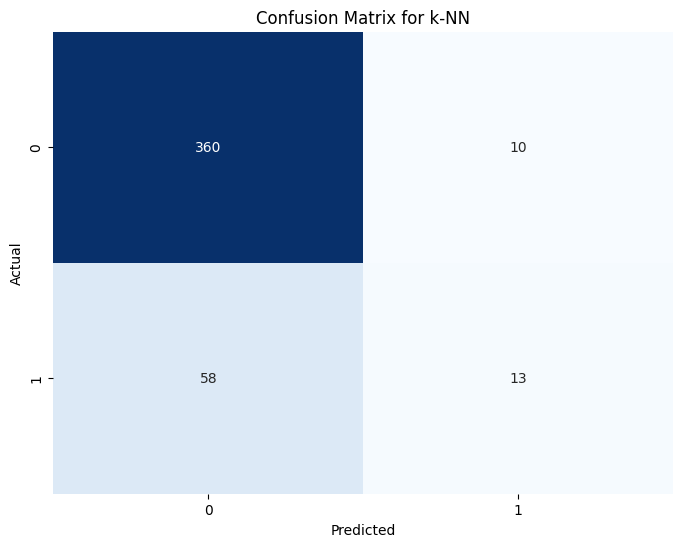

Визуализация разделения данных доступна только для двумерных признаков.


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Создание модели k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Используем 5 соседей (можно изменить) можно не ставить соседей, результат тот же будет, это упрощает вычисление

# Обучение модели на обучающей выборке
knn_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = knn_model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)

# Отчёт о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN')
plt.show()

# Визуализация разделения данных (если признаки двумерные)
if X_train.shape[1] == 2:  # Проверяем, что признаки двумерные
    plt.figure(figsize=(10, 6))

    # Создаем сетку для визуализации
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Предсказание для каждой точки сетки
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация разделения
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label='Train data')
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, marker='x', edgecolors='k', cmap=plt.cm.coolwarm, label='Test data')
    plt.title('k-NN Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
else:
    print("Визуализация разделения данных доступна только для двумерных признаков.")

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

**Пример кода с масштабированием данных:**

In [20]:
from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели k-NN
knn_model_scaled = KNeighborsClassifier(n_neighbors=5)
knn_model_scaled.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = knn_model_scaled.predict(X_test_scaled)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.8390022675736961


In [21]:
X_test_scaled

array([[-1.42068001,  1.04481283, -0.92486016, ..., -0.90343777,
        -0.87970057, -0.43918612],
       [ 0.90042381, -0.82440606, -0.92486016, ...,  1.59799448,
         1.58370488,  1.00350348],
       [-1.71236787,  1.04481283, -0.92486016, ..., -0.93470567,
        -0.91042537, -0.43918612],
       ...,
       [-0.84424584, -0.82440606, -0.92486016, ..., -0.86695855,
        -0.83270972, -0.43918612],
       [-1.34484979, -0.82440606, -0.92486016, ..., -0.8825925 ,
        -0.88331526, -0.43918612],
       [ 1.21437243, -0.82440606,  0.90823346, ...,  2.15213121,
         2.12590711,  1.00350348]])

 Мы можем использовать только те признаки, которые были определены как важные случайным лесом, чтобы улучшить качество модели k-NN. Это также может ускорить обучение, так как мы уменьшим количество признаков.

Accuracy on test set:  0.8458049886621315

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       370
           1       0.57      0.18      0.28        71

    accuracy                           0.85       441
   macro avg       0.71      0.58      0.60       441
weighted avg       0.81      0.85      0.81       441


Confusion Matrix:
[[360  10]
 [ 58  13]]


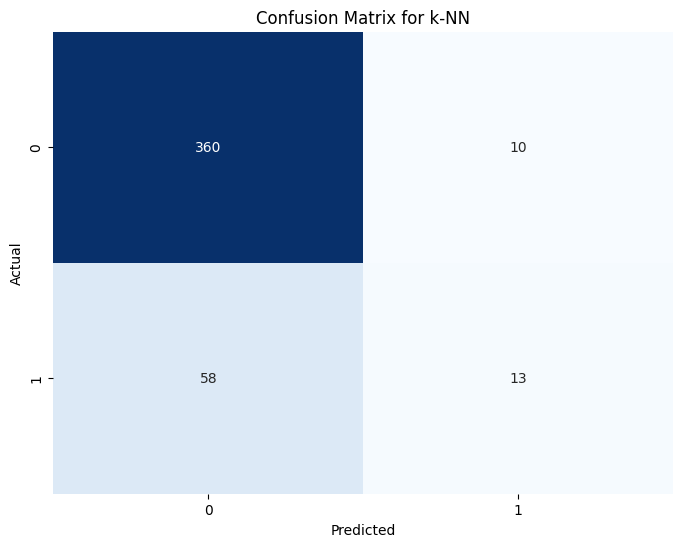

Визуализация разделения данных доступна только для двумерных признаков.


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Важные признаки, выявленные случайным лесом
important_features = [
    'Recency', 'Customer_Days', 'AcceptedCmpOverall', 'MntRegularProds',
    'Income', 'MntTotal', 'MntWines', 'MntMeatProducts', 'Age', 'MntGoldProds'
]

# Выбор только важных признаков
features_2 = df[important_features]  # Оставляем только важные признаки
labels_2 = df['Response']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, labels_2, test_size=0.20, random_state=5)

# Создание и обучение модели k-NN
knn_model_important = KNeighborsClassifier(n_neighbors=5)  # Используем 5 соседей
knn_model_important.fit(X_train_2, y_train_2)

# Предсказание на тестовой выборке
y_pred_important = knn_model_important.predict(X_test_2)

# Оценка точности модели
accuracy = accuracy_score(y_test_2, y_pred_important)
print("Accuracy on test set: ", accuracy)

# Отчёт о классификации
print("\nClassification Report:")
print(classification_report(y_test_2, y_pred_important))

# Матрица ошибок (confusion matrix)
conf_matrix = confusion_matrix(y_test_2, y_pred_important)
print("\nConfusion Matrix:")
print(conf_matrix)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-NN')
plt.show()

# Визуализация разделения данных (если признаки двумерные)
if X_train_2.shape[1] == 2:  # Проверяем, что признаки двумерные
    plt.figure(figsize=(10, 6))

    # Создаем сетку для визуализации
    x_min, x_max = X_train_2.iloc[:, 0].min() - 1, X_train_2.iloc[:, 0].max() + 1
    y_min, y_max = X_train_2.iloc[:, 1].min() - 1, X_train_2.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Предсказание для каждой точки сетки
    Z = knn_model_important.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация разделения
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_2.iloc[:, 0], X_train_2.iloc[:, 1], c=y_train_2, edgecolors='k', cmap=plt.cm.coolwarm, label='Train data')
    plt.scatter(X_test_2.iloc[:, 0], X_test_2.iloc[:, 1], c=y_test_2, marker='x', edgecolors='k', cmap=plt.cm.coolwarm, label='Test data')
    plt.title('k-NN Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
else:
    print("Визуализация разделения данных доступна только для двумерных признаков.")

**Визуализируйте данные с помощью pairplot для анализа попарных взаимодействий признаков.**

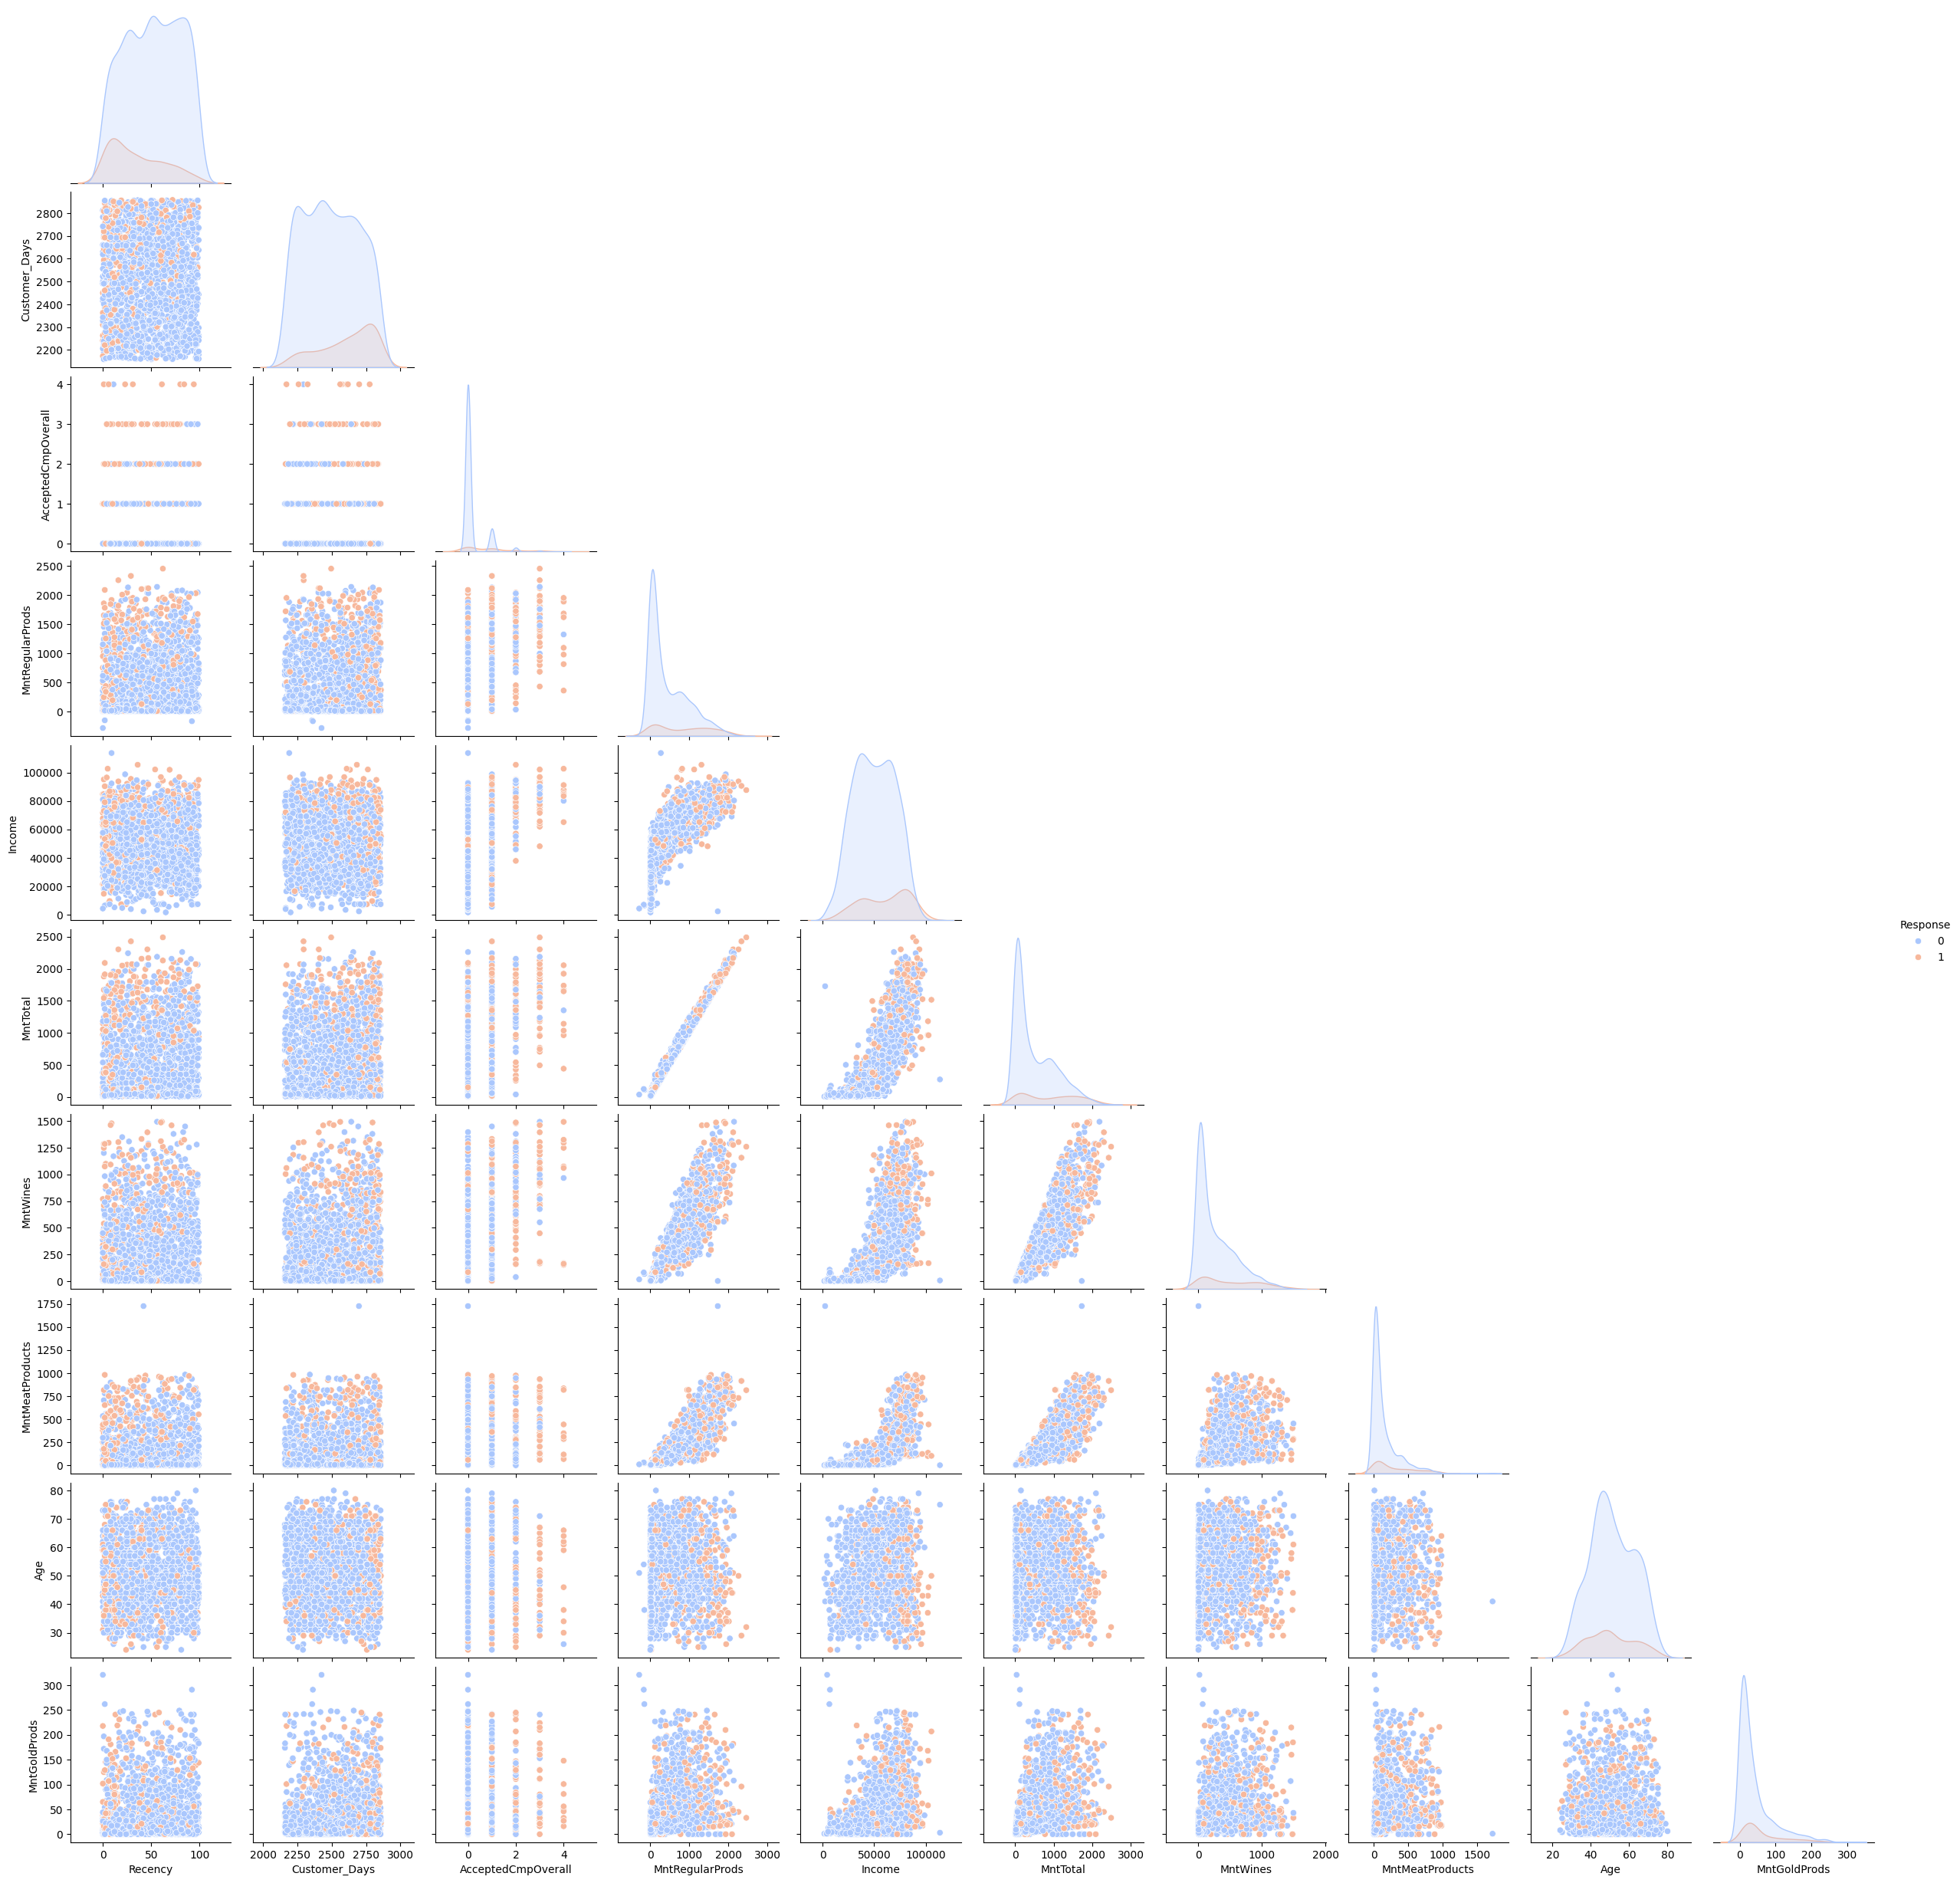

In [23]:
import seaborn as sns

# Добавляем целевой столбец 'Response' к данным для визуализации
df_important = df[important_features + ['Response']]

# Визуализация попарных признаков
sns.pairplot(df_important, hue='Response', palette='coolwarm', corner=True)
plt.show()

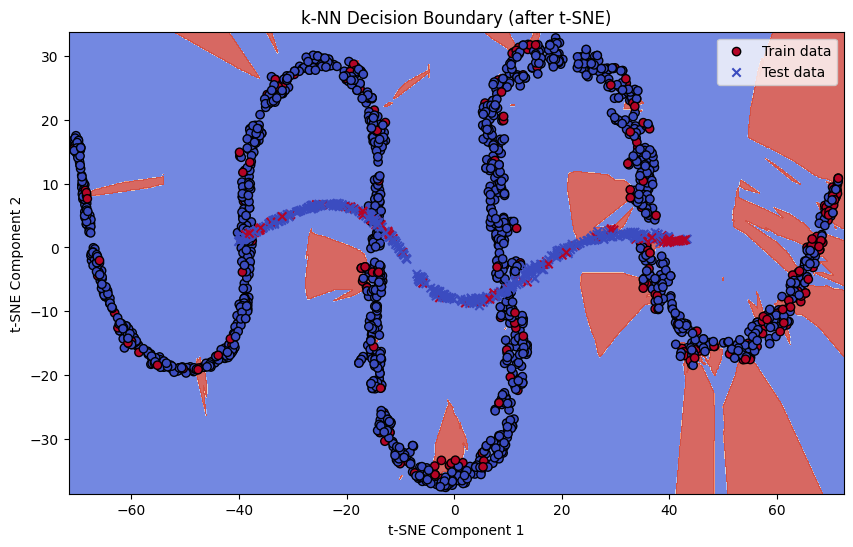

In [24]:
from sklearn.manifold import TSNE

# Применяем t-SNE для снижения размерности до 2 компонент
tsne = TSNE(n_components=2, random_state=5)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Обучаем k-NN на данных после t-SNE
knn_model_tsne = KNeighborsClassifier(n_neighbors=5)
knn_model_tsne.fit(X_train_tsne, y_train)

# Визуализация разделения данных
plt.figure(figsize=(10, 6))

# Создаем сетку для визуализации
x_min, x_max = X_train_tsne[:, 0].min() - 1, X_train_tsne[:, 0].max() + 1
y_min, y_max = X_train_tsne[:, 1].min() - 1, X_train_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Предсказание для каждой точки сетки
Z = knn_model_tsne.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация разделения
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label='Train data')
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, marker='x', edgecolors='k', cmap=plt.cm.coolwarm, label='Test data')
plt.title('k-NN Decision Boundary (after t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

Применение t-SNE для уменьшения размерности:

Применяем t-SNE для уменьшения размерности данных до 2D.

Создание DataFrame для визуализации:

Создаем DataFrame tsne_df, который содержит результаты t-SNE, истинные метки и предсказанные метки.

Визуализация результатов t-SNE с классификацией случайного леса:

Создаем два подграфика с помощью plt.subplots.

Строим график рассеяния для истинных меток на первом подграфике.

Строим график рассеяния для предсказанных меток на втором подграфике.

Устанавливаем заголовки и метки осей для каждого подграфика.

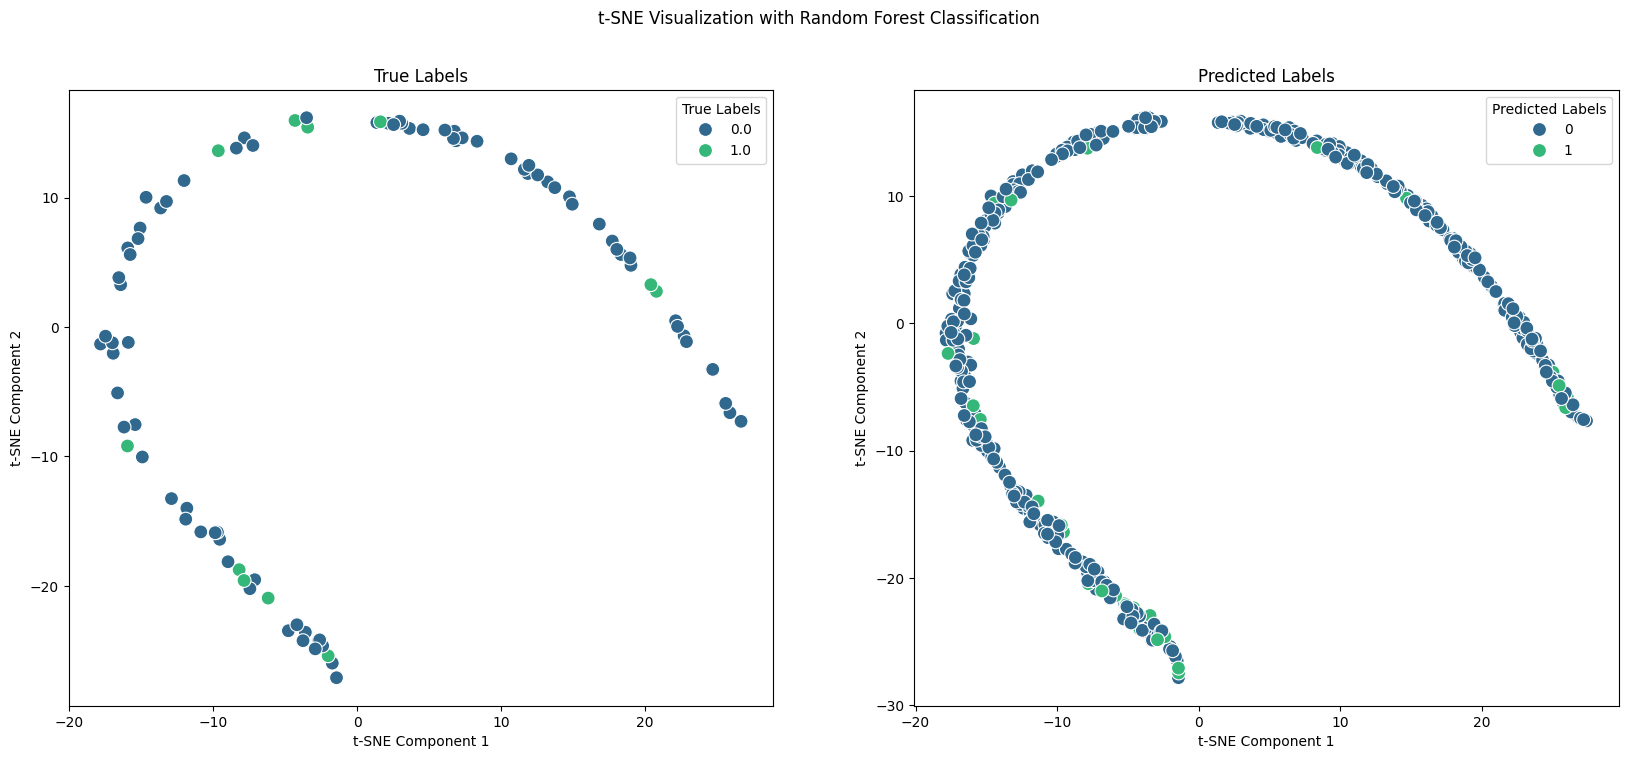

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Лучшие параметры, найденные ранее
best_params = {
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_split': 3,
    'n_estimators': 50
}

# Создание модели случайного леса с лучшими параметрами
rf_model_2 = RandomForestClassifier(**best_params, random_state=5)

# Обучение модели на обучающей выборке
rf_model_2.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_2 = rf_model_2.predict(X_test)

# Применение t-SNE для уменьшения размерности
tsne_2 = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_test_tsne_2 = tsne_2.fit_transform(X_test)

# Создание DataFrame для визуализации
tsne_df_2 = pd.DataFrame(X_test_tsne_2, columns=['TSNE_1', 'TSNE_2'])
tsne_df_2['True Labels'] = y_test
tsne_df_2['Predicted Labels'] = y_pred_2

# Визуализация результатов t-SNE с классификацией случайного леса
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# График истинных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='True Labels', data=tsne_df_2, palette='viridis', s=100, ax=axes[0])
axes[0].set_title('True Labels')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# График предсказанных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Predicted Labels', data=tsne_df_2, palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Predicted Labels')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

plt.suptitle('t-SNE Visualization with Random Forest Classification')
plt.show()

**Убедимся, что rf_model_2 использует параметры, которые вы нашли с помощью GridSearchCV.**

In [29]:
print(rf_model_2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}


In [30]:
print("Старые предсказания:", y_pred[:10])
print("Новые предсказания:", y_pred_2[:10])

Старые предсказания: [0 0 0 0 0 0 0 1 0 0]
Новые предсказания: [0 0 0 0 0 0 0 0 0 0]


In [31]:
print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)

Форма X_train: (1764, 38)
Форма X_test: (441, 38)


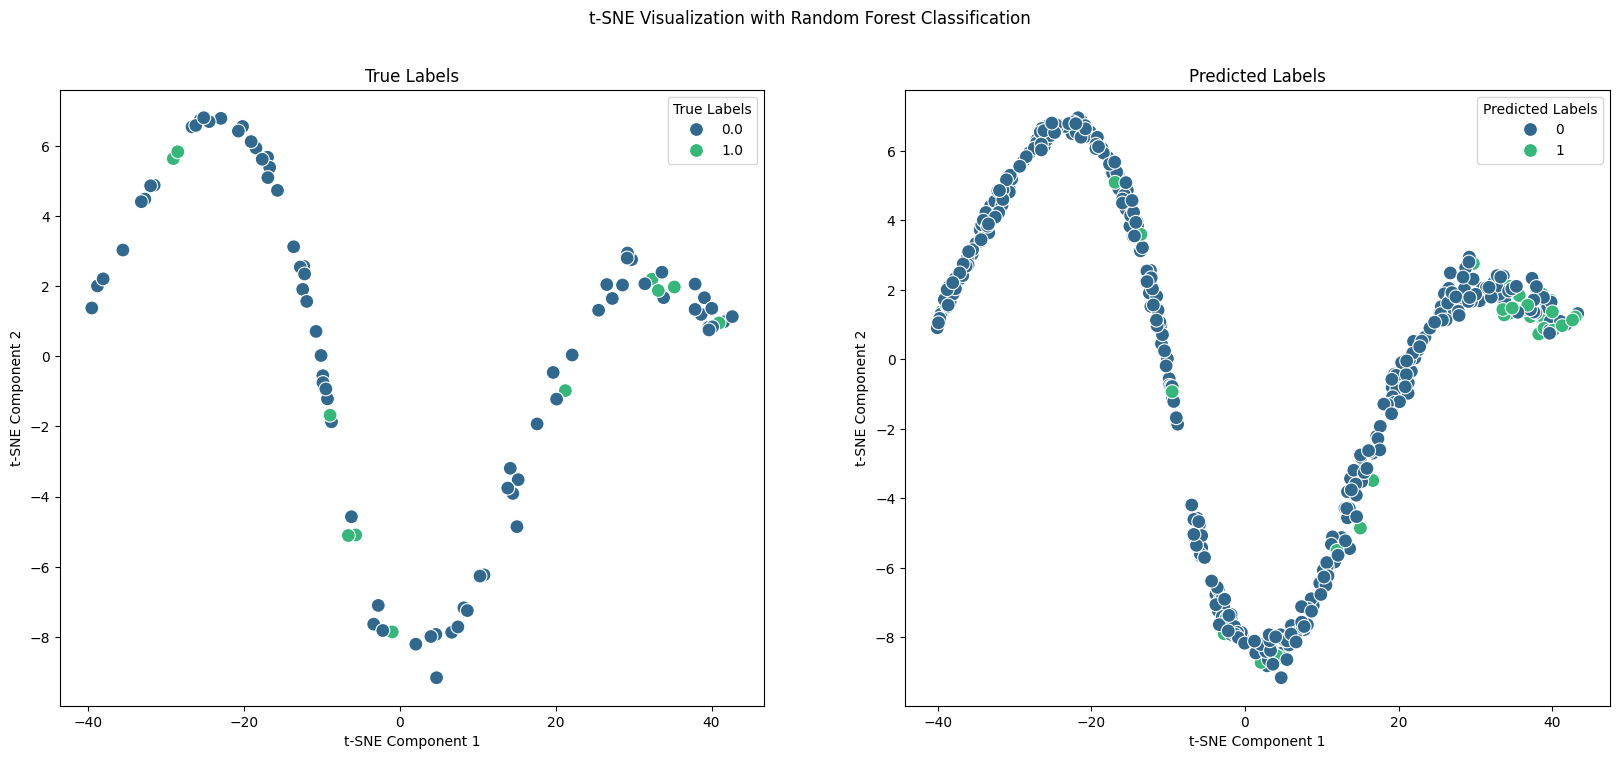

In [34]:
# Применение t-SNE для уменьшения размерности         ИСПОЛЬЗУЕМ ПАРАМЕТРЫ ПРЕДЫДУЩЕГО КОДА - ПРЕДИКТОРЫ И ДАННЫЕ ТЕСТОВЫЕ
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test)


# Создание DataFrame для визуализации
tsne_df = pd.DataFrame(X_test_tsne, columns=['TSNE_1', 'TSNE_2'])
tsne_df['True Labels'] = y_test
tsne_df['Predicted Labels'] = y_pred

# Визуализация результатов t-SNE с классификацией случайного леса
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# График истинных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='True Labels', data=tsne_df, palette='viridis', s=100, ax=axes[0])
axes[0].set_title('True Labels')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# График предсказанных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Predicted Labels', data=tsne_df, palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Predicted Labels')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

plt.suptitle('t-SNE Visualization with Random Forest Classification')
plt.show()

Параметры модели rf_model_2:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 5, 'verbose': 0, 'warm_start': False}

Старые предсказания (y_pred): [0 0 0 0 0 0 0 1 0 0]
Новые предсказания (y_pred_2): [0 0 0 0 0 0 0 0 0 0]

Форма X_train: (1764, 38)
Форма X_test: (441, 38)


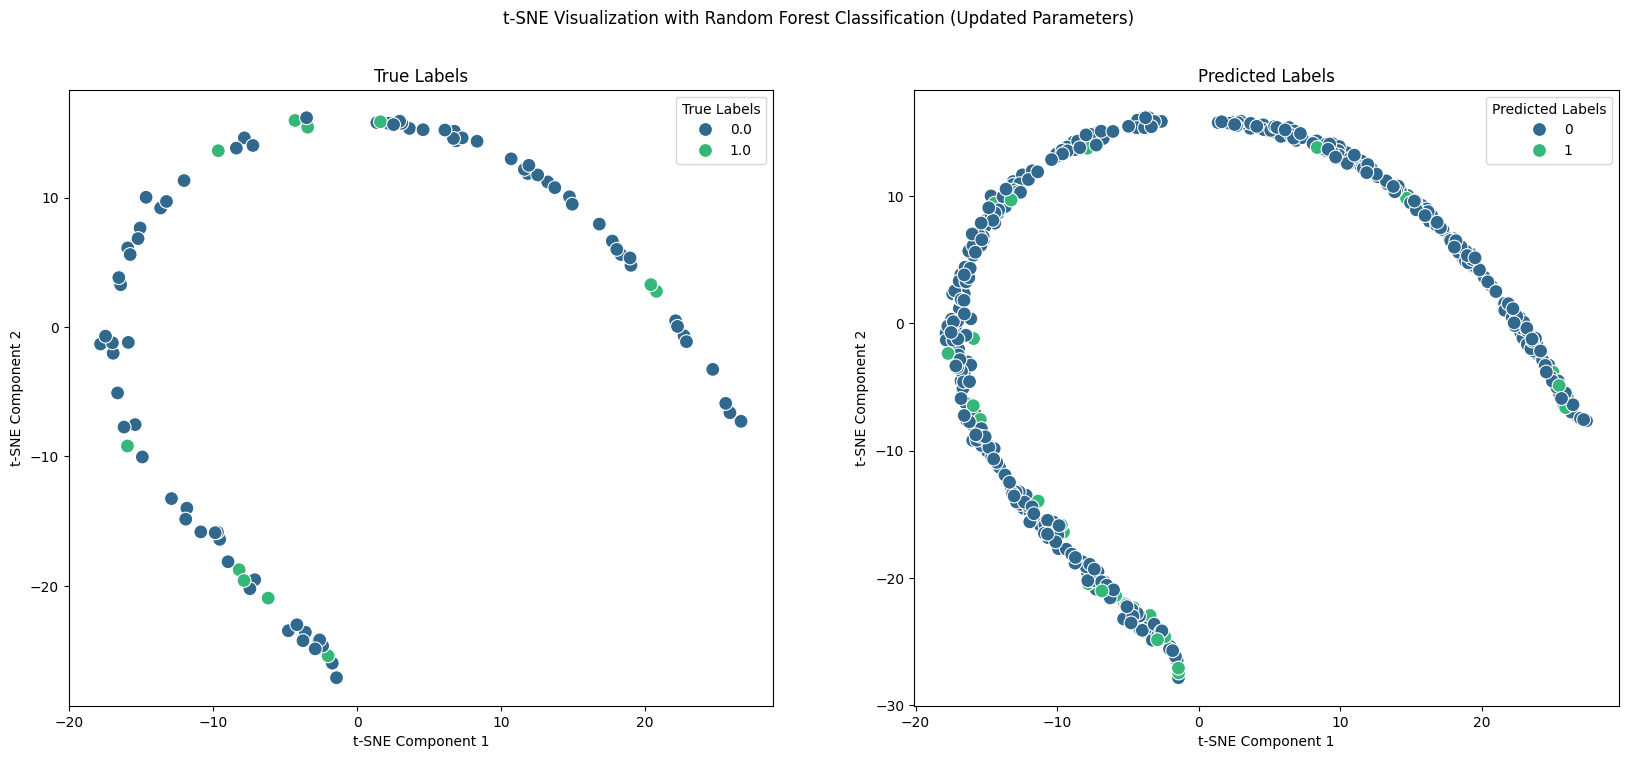

In [36]:
# Проверка параметров модели
print("Параметры модели rf_model_2:")
print(rf_model_2.get_params())

# Проверка предсказаний
print("\nСтарые предсказания (y_pred):", y_pred[:10])
print("Новые предсказания (y_pred_2):", y_pred_2[:10])

# Проверка данных
print("\nФорма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)

# Изменение параметров t-SNE
tsne_2 = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_test_tsne_2 = tsne_2.fit_transform(X_test)

# Создание DataFrame для визуализации
tsne_df_2 = pd.DataFrame(X_test_tsne_2, columns=['TSNE_1', 'TSNE_2'])
tsne_df_2['True Labels'] = y_test
tsne_df_2['Predicted Labels'] = y_pred_2

# Визуализация результатов t-SNE с классификацией случайного леса
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# График истинных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='True Labels', data=tsne_df_2, palette='viridis', s=100, ax=axes[0])
axes[0].set_title('True Labels')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# График предсказанных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Predicted Labels', data=tsne_df_2, palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Predicted Labels')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

plt.suptitle('t-SNE Visualization with Random Forest Classification (Updated Parameters)')
plt.show()

feature_importance (важность признаков) — это метрика, которая показывает, насколько каждый признак (столбец данных) важен для модели при принятии решений. В контексте моделей машинного обучения, таких как случайный лес (Random Forest), feature_importance помогает понять, какие признаки наиболее сильно влияют на предсказания модели.

Для случайного леса:

В случайном лесе важность признака вычисляется на основе того, насколько часто этот признак используется для разделения данных в деревьях, и насколько хорошо это разделение улучшает качество модели (например, уменьшает энтропию или увеличивает точность).

Чем чаще признак используется для разделения и чем больше он улучшает качество модели, тем выше его важность.

Для других моделей:

В линейных моделях (например, логистическая регрессия) важность признака может быть определена через абсолютные значения коэффициентов.

В градиентном бустинге (например, XGBoost, LightGBM) важность признака вычисляется на основе того, как часто признак используется для разделения и насколько он уменьшает ошибку.

Как интерпретировать feature_importance?
Высокая важность: Признак сильно влияет на предсказания модели.

Низкая важность: Признак слабо влияет на предсказания модели.

Нулевая важность: Признак не используется моделью.

In [27]:
feature_importance

,features,importance
0,Income,5.822946
1,Kidhome,0.766696
2,Teenhome,0.892152
3,Recency,8.370933
4,MntWines,4.848418
5,MntFruits,3.217758
6,MntMeatProducts,4.830213
7,MntFishProducts,3.122002
8,MntSweetProducts,3.450876
9,MntGoldProds,4.138235


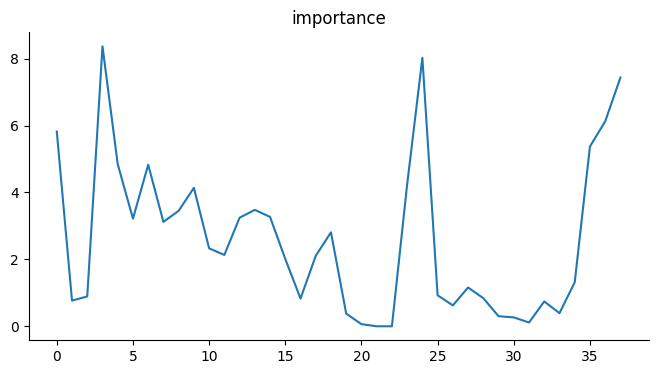

In [28]:
from matplotlib import pyplot as plt
feature_importance['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

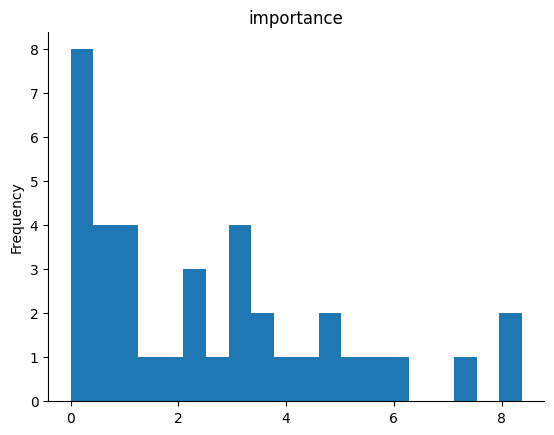

In [37]:
from matplotlib import pyplot as plt
feature_importance['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

используем признаки, которые были определены как наиболее важные в модели случайного леса, в других моделях, таких как метод k-ближайших соседей (k-NN). Это может помочь улучшить производительность модели k-NN, так как вы будете использовать только те признаки, которые наиболее влияют на предсказания.

Шаги для использования признаков в методе k-NN
Выбор признаков: Выберите признаки, которые были определены как наиболее важные в модели случайного леса.

Обучение модели k-NN: Используйте выбранные признаки для обучения модели k-NN.

Оценка модели k-NN: Оцените качество модели k-NN на тестовой выборке.

Выбор признаков: Мы выбираем признаки, которые были определены как наиболее важные в модели случайного леса.

Создание новых наборов данных: Мы создаем новые наборы данных (X_train_important и X_test_important), которые содержат только выбранные признаки.

Обучение модели k-NN: Мы обучаем модель k-NN на новых наборах данных.

Предсказание и оценка: Мы используем обученную модель k-NN для предсказаний на тестовой выборке и оцениваем ее качество.

**Этот код просто как вариант, мы его уже выше далали**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Выбор признаков, которые были определены как наиболее важные
important_features = [
    'Recency', 'Customer_Days', 'AcceptedCmpOverall', 'MntRegularProds', 'Income',
    'MntTotal', 'MntWines', 'MntMeatProducts', 'Age', 'MntGoldProds'
]

# Создание новых наборов данных с выбранными признаками
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Обучение модели k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_important, y_train)

# Предсказание на тестовой выборке
y_pred_knn = knn_model.predict(X_test_important)

# Оценка качества модели k-NN
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN model: ", accuracy_knn)

Accuracy of k-NN model:  0.8458049886621315


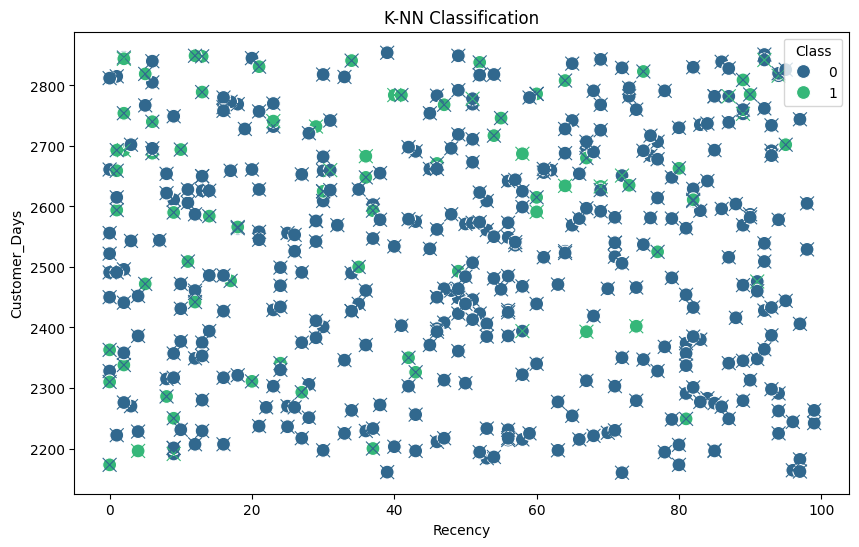

In [40]:
# Визуализация расстояний и классов (для двух признаков)
if len(important_features) >= 2:
    feature1 = important_features[0]
    feature2 = important_features[1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_test[feature1], y=X_test[feature2], hue=y_test, palette='viridis', s=100)
    sns.scatterplot(x=X_test[feature1], y=X_test[feature2], hue=y_pred_knn, palette='viridis', marker='x', s=100, legend=False)
    plt.title('K-NN Classification')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title='Class', loc='upper right')
    plt.show()

есть два графика, которые помогут вам визуально оценить, как данные распределены в пространстве двух главных компонент t-SNE и как модель k-NN классифицирует эти данные.

Заключение:
Истинные метки:

На первом графике вы видите, как данные распределены в пространстве двух главных компонент t-SNE с учетом истинных меток классов. Это помогает понять, как данные распределены в исходном пространстве.

Предсказанные метки:

На втором графике вы видите, как модель k-NN классифицирует данные в пространстве двух главных компонент t-SNE. Это помогает понять, как модель работает и где она допускает ошибки.

Пример интерпретации:
Кластеры: Вы можете видеть, как данные группируются в кластеры на обоих графиках. Если кластеры на обоих графиках совпадают, это означает, что модель хорошо классифицирует данные. Если кластеры различаются, это указывает на области, где модель допускает ошибки.

Ошибки классификации: Вы можете видеть, где модель допускает ошибки, сравнивая распределение данных на первом и втором графиках. Если данные, которые должны быть в одном кластере, оказываются в другом кластере на втором графике, это указывает на ошибки классификации.

Заключение:
Применение t-SNE для визуализации данных с использованием метода ближайших соседей (k-NN) позволяет лучше понять структуру данных и точность классификации. Этот подход помогает выявить области, где модель работает хорошо, и области, где она допускает ошибки.

Accuracy of k-NN model:  0.8458049886621315


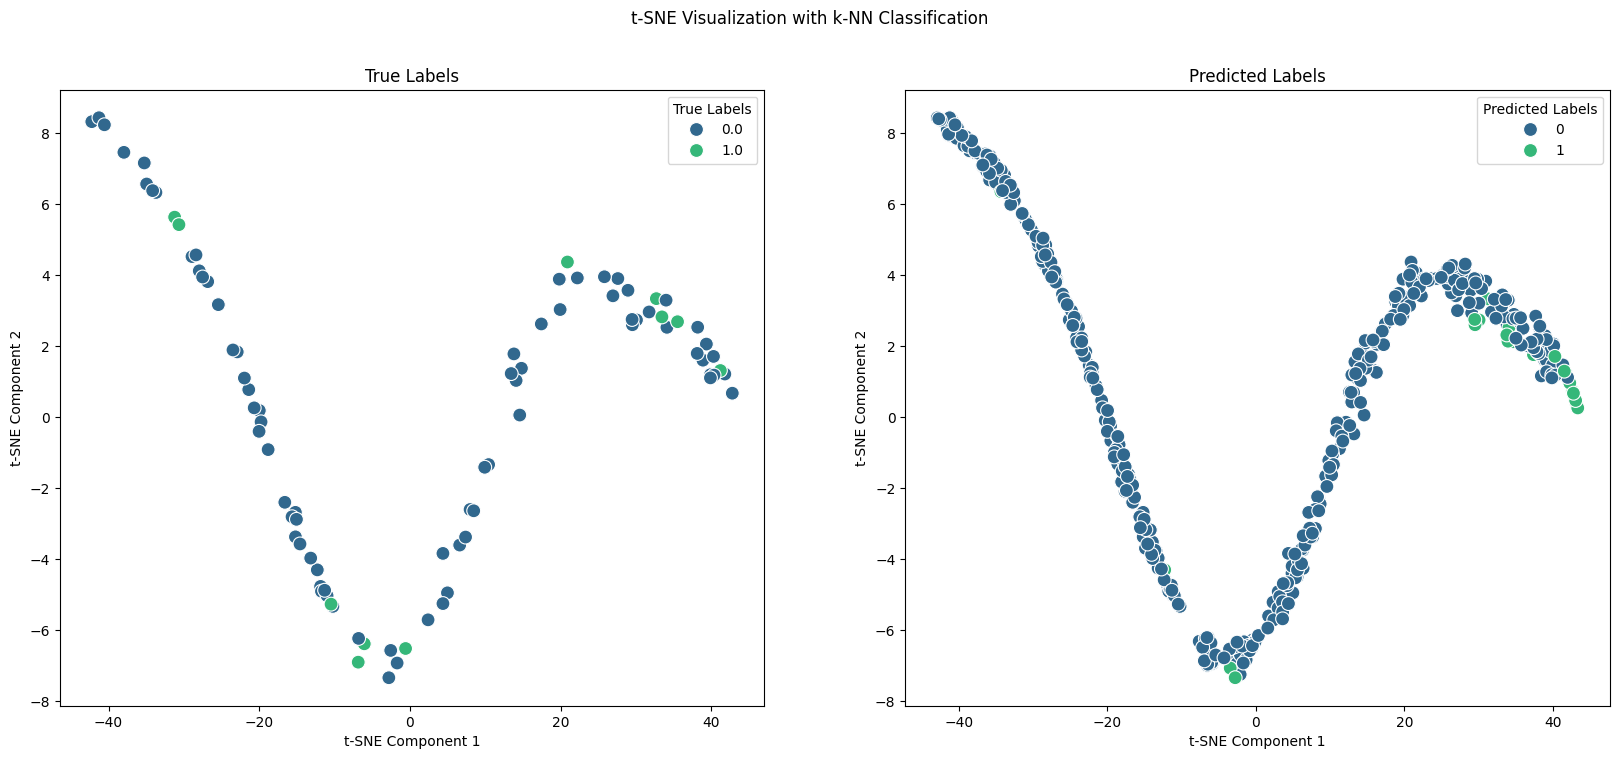

In [41]:
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Выбор признаков, которые были определены как наиболее важные
important_features = [
    'Recency', 'Customer_Days', 'AcceptedCmpOverall', 'MntRegularProds', 'Income',
    'MntTotal', 'MntWines', 'MntMeatProducts', 'Age', 'MntGoldProds'
]

# Создание новых наборов данных с выбранными признаками
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Обучение модели k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_important, y_train)

# Предсказание на тестовой выборке
y_pred_knn = knn_model.predict(X_test_important)

# Оценка качества модели k-NN
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN model: ", accuracy_knn)

# Применение t-SNE для уменьшения размерности
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_important)

# Создание DataFrame для визуализации
tsne_df = pd.DataFrame(X_test_tsne, columns=['TSNE_1', 'TSNE_2'])
tsne_df['True Labels'] = y_test
tsne_df['Predicted Labels'] = y_pred_knn

# Визуализация результатов t-SNE с классификацией k-NN
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# График истинных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='True Labels', data=tsne_df, palette='viridis', s=100, ax=axes[0])
axes[0].set_title('True Labels')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# График предсказанных меток
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Predicted Labels', data=tsne_df, palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Predicted Labels')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

plt.suptitle('t-SNE Visualization with k-NN Classification')
plt.show()

Импортируем необходимые библиотеки: TSNE для применения t-SNE, RandomForestClassifier для случайного леса, train_test_split для разделения данных, metrics для оценки качества модели, matplotlib.pyplot, seaborn и pandas для визуализации.

Создание и обучение модели случайного леса:

Создаем и обучаем модель случайного леса с оптимальными гиперпараметрами.

Предсказание на тестовой выборке:

Делаем предсказание на тестовой выборке и оцениваем качество модели с помощью accuracy_score.

Применение t-SNE для уменьшения размерности обучающей и тестовой выборок:

Применяем t-SNE для уменьшения размерности данных до 2D для обеих выборок.

Создание DataFrame для визуализации:

Создаем DataFrame train_tsne_df для обучающей выборки, который содержит результаты t-SNE и истинные метки.

Создаем DataFrame test_tsne_df для тестовой выборки, который содержит результаты t-SNE, истинные метки и предсказанные метки.

Визуализация результатов t-SNE с классификацией случайного леса:

Создаем три подграфика с помощью plt.subplots.

Строим график рассеяния для истинных меток обучающей выборки на первом подграфике.

Строим график рассеяния для истинных меток тестовой выборки на втором подграфике.

Строим график рассеяния для предсказанных меток тестовой выборки на третьем подграфике.

Устанавливаем заголовки и метки осей для каждого подграфика.

Пример визуализации:
Предположим, у вас есть данные с классификацией. Вот как может выглядеть график:

t-SNE Visualization with Random Forest Classification

Этот график поможет вам визуально оценить, как данные распределены в пространстве двух главных компонент t-SNE и как модель случайного леса классифицирует эти данные.

Заключение:
Применение t-SNE для визуализации данных с использованием модели случайного леса позволяет лучше понять структуру данных и точность классификации. Этот подход помогает выявить области, где модель работает хорошо, и области, где она допускает ошибки.



Accuracy on test set:  0.8594104308390023


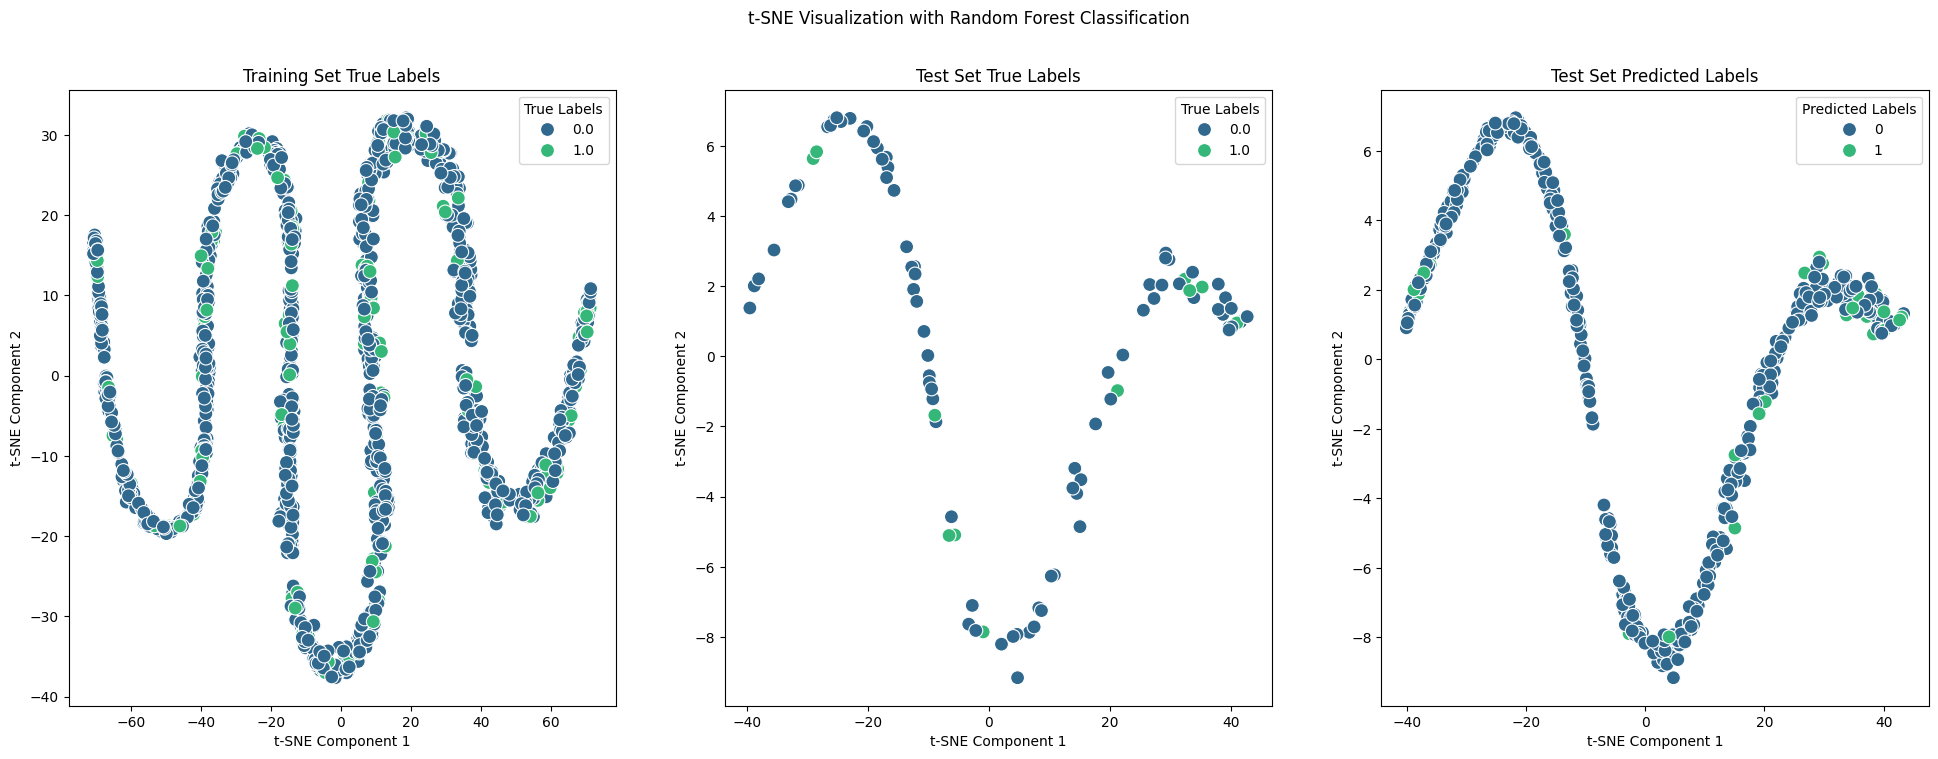

In [42]:
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Создание и обучение финальной модели с оптимальными гиперпараметрами
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    criterion=best_params['criterion'],
    min_samples_split=best_params['min_samples_split'],
    random_state=5
)

# Обучение модели на всей обучающей выборке
best_rf_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = best_rf_model.predict(X_test)

# Оценка качества модели
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)

# Применение t-SNE для уменьшения размерности обучающей выборки
tsne_train = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne_train.fit_transform(X_train)

# Применение t-SNE для уменьшения размерности тестовой выборки
tsne_test = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne_test.fit_transform(X_test)

# Создание DataFrame для визуализации обучающей выборки
train_tsne_df = pd.DataFrame(X_train_tsne, columns=['TSNE_1', 'TSNE_2'])
train_tsne_df['True Labels'] = y_train

# Создание DataFrame для визуализации тестовой выборки
test_tsne_df = pd.DataFrame(X_test_tsne, columns=['TSNE_1', 'TSNE_2'])
test_tsne_df['True Labels'] = y_test
test_tsne_df['Predicted Labels'] = y_pred

# Визуализация результатов t-SNE с классификацией случайного леса
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# График истинных меток обучающей выборки
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='True Labels', data=train_tsne_df, palette='viridis', s=100, ax=axes[0])
axes[0].set_title('Training Set True Labels')
axes[0].set_xlabel('t-SNE Component 1')
axes[0].set_ylabel('t-SNE Component 2')

# График истинных меток тестовой выборки
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='True Labels', data=test_tsne_df, palette='viridis', s=100, ax=axes[1])
axes[1].set_title('Test Set True Labels')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

# График предсказанных меток тестовой выборки
sns.scatterplot(x='TSNE_1', y='TSNE_2', hue='Predicted Labels', data=test_tsne_df, palette='viridis', s=100, ax=axes[2])
axes[2].set_title('Test Set Predicted Labels')
axes[2].set_xlabel('t-SNE Component 1')
axes[2].set_ylabel('t-SNE Component 2')

plt.suptitle('t-SNE Visualization with Random Forest Classification')
plt.show()

Выбор признаков: Мы выбираем признаки, которые были определены как наиболее важные в модели случайного леса.

Обучение модели k-NN: Мы обучаем модель k-NN на новых наборах данных.

Предсказание и оценка: Мы используем обученную модель k-NN для предсказаний на тестовой выборке и оцениваем ее качество.

Визуализация: Мы визуализируем расстояния и классы на графике. Для простоты используем только два признака.

Визуализация
Scatterplot: Мы используем sns.scatterplot для создания графика рассеяния.

Hue: Мы используем цвет (hue) для обозначения классов.

Legend: Мы добавляем легенду для удобства интерпретации.

Вывод
Этот код позволяет вам визуализировать расстояния и классы на графике, что помогает лучше понять, как модель k-NN работает на ваших данных. Однако, если у вас многомерные данные, их сложно визуализировать на двумерном графике. В таком случае можно использовать методы уменьшения размерности, такие как PCA (Principal Component Analysis), чтобы снизить количество признаков до двух или трех для визуализации.

мы можем использовать методы уменьшения размерности, такие как PCA (Principal Component Analysis), чтобы снизить количество признаков до двух или трех для визуализации. Затем мы можем построить график, на котором будут показаны данные, распределенные по классам.

Применение PCA: Мы применяем PCA для уменьшения размерности данных до двух компонентов.

Визуализация: Мы визуализируем данные после PCA, чтобы увидеть, как они распределяются по классам.

Визуализация
PCA: PCA преобразует данные в двумерное пространство, что позволяет нам визуализировать их на графике.

Scatterplot: Мы используем sns.scatterplot для создания графика рассеяния.

Hue: Мы используем цвет (hue) для обозначения классов.

Legend: Мы добавляем легенду для удобства интерпретации.

Вывод
Этот код позволяет вам визуализировать данные после уменьшения размерности с помощью PCA и увидеть, как они распределяются по классам. Это помогает лучше понять, как модель k-NN работает на ваших данных и как данные распределяются по классам на основе наиболее важных признаков.

Accuracy of k-NN model:  0.8458049886621315


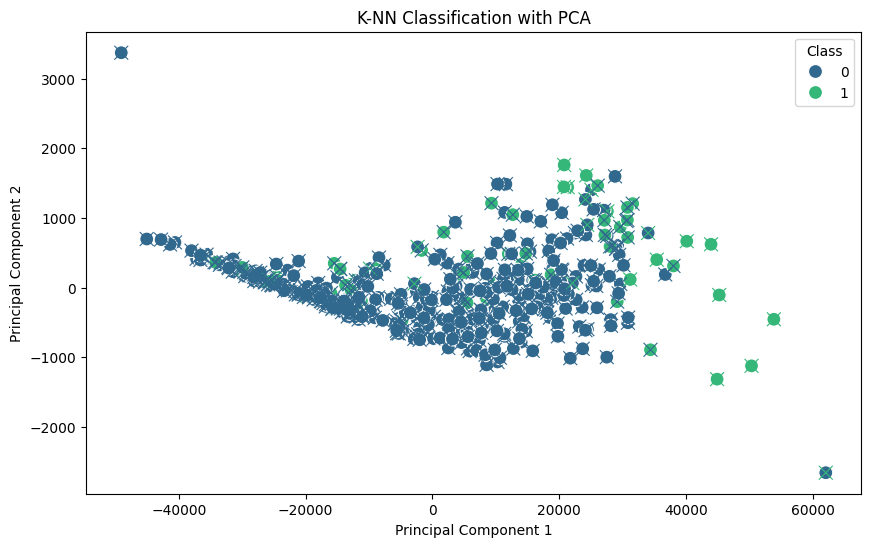

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

# Выбор признаков, которые были определены как наиболее важные
important_features = [
    'Recency', 'Customer_Days', 'AcceptedCmpOverall', 'MntRegularProds', 'Income',
    'MntTotal', 'MntWines', 'MntMeatProducts', 'Age', 'MntGoldProds'
]

# Создание новых наборов данных с выбранными признаками
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Обучение модели k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_important, y_train)

# Предсказание на тестовой выборке
y_pred_knn = knn_model.predict(X_test_important)

# Оценка качества модели k-NN
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy of k-NN model: ", accuracy_knn)

# Применение PCA для уменьшения размерности до 2 компонентов
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_important)
X_test_pca = pca.transform(X_test_important)

# Визуализация данных после PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='viridis', s=100)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_knn, palette='viridis', marker='x', s=100, legend=False)
plt.title('K-NN Classification with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.show()